In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [2]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357250 sha256=f3022e09b0561f810334864d55ec22f23ebc0953e6944f09b35bf823f599d4b9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
df = pd.read_csv('ratings_top.csv')

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)

In [3]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df), len(df['isbn'].unique()), len(df['user_id'].unique())))

Number of ratings: 176595
Number of books: 16766
Number of users: 20155


In [4]:
def get_model_name(model):
    return str(model).split('.')[-1].split(' ')[0].replace("'>", "")

def cv_multiple_models(data, models_dict, cv=3):
    results = []  # Initialize results as a list

    for model_name, model in models_dict.items():
        print('\n---> CV for %s...' % model_name)

        cv_results = cross_validate(model, data, cv=cv)
        tmp = pd.DataFrame(cv_results).mean()
        tmp['model'] = model_name
        results.append(tmp)  # Append to the list

    return pd.concat(results, axis=1, ignore_index=True).transpose()  # Concatenate results into a DataFrame

def generate_models_dict(models, sim_names, user_based):
    models_dict = {}

    for sim_name in sim_names:
        sim_dict = {
            'name': sim_name,
            'user_based': user_based
        }
        for model in models:
            model_name = get_model_name(model) + ' ' + sim_name
            models_dict[model_name] = model(sim_options=sim_dict)

    return models_dict

def draw_model_results(results):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    plt.xticks(rotation=90)

    palette = sns.color_palette("RdBu", len(results))

    sns.barplot(x='model', y='test_rmse', data=results, palette=palette, ax=ax1)
    ax1.set_title('Test RMSE and fit time of evaluated models')

    ax2 = ax1.twinx()
    sns.scatterplot(x='model', y='fit_time', data=results, color='black', ax=ax2)
    ax2.set(ylim=(0, results['fit_time'].max() * 1.1))

    plt.show()

In [5]:
models1 = generate_models_dict([KNNBasic, KNNWithMeans], ['msd'], True)

In [6]:
models1 = generate_models_dict([KNNBasic, KNNWithMeans], ['msd'], True)
results1 = cv_multiple_models(data, models1)
models1 = None
display(results1)


---> CV for KNNBasic msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,test_mae,fit_time,test_time,model
0,1.947344,1.495628,9.964118,1.993498,KNNBasic msd
1,1.824246,1.366112,10.341275,2.12141,KNNWithMeans msd


<ipython-input-4-1b1ea5ae1e16>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='test_rmse', data=results, palette=palette, ax=ax1)


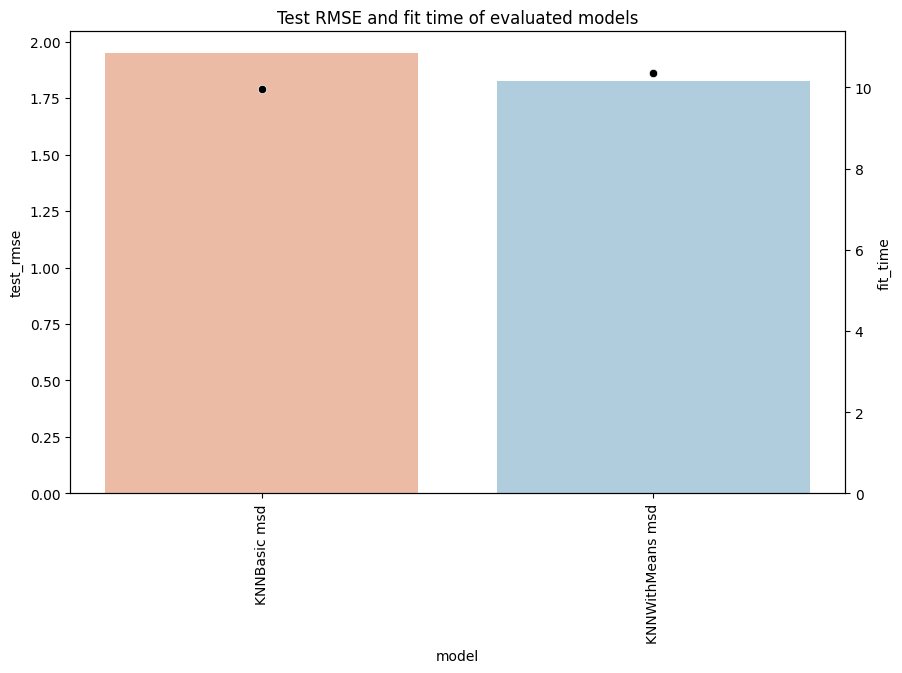

In [7]:
draw_model_results(results1)